<a href="https://colab.research.google.com/github/mennadwidar/Face-Detection-in-Python-using-OpenCV/blob/master/Copy_of_Copy_of_Regression_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Mohamed Ahmed Soliman

ID: 43-3379

Tutorial: MET

---

Name: Menna Youssef Dwidar

ID: 43-2266

Tutorial: MET

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2021/main/data/car_prices.csv')

df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0mi,—,gray,wheels exchange llc,$15650,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0mi,black,black,nissan infiniti lt,$19350,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0mi,white,beige,motorcars of south texas,$22200,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0mi,black,beige,avis rac/san leandro,$13400,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [4]:
df.describe(include='all')

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
count,46578.000000,46578,46578,46578,46578,46578,46578,46578,46578.000000,46578,46578,46578,46578,46578,46578,46578
unique,NaN,48,648,1097,71,2,46578,34,NaN,39460,20,17,4686,1021,953,2286
top,NaN,Ford,Altima,Base,Sedan,automatic,wddgf56xx8f068920,fl,NaN,1.0mi,black,black,"ford motor credit company,llc",$11300,$12000,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,NaN,7871,1610,4851,17171,44928,1,7451,NaN,86,9156,20734,1733,168,397,490
mean,2010.203401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.424265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.831316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.rename(columns={'year':'Year','make':'Brand','model':'Model','trim':'Trim','body':'Body','transmission':'Transmission','vin':'VIN','state':'State','condition':'Condition','odometer':'Odometer','color':'Color','interior':'Interior','seller':'Seller','mmr':'MMR','sellingprice':'SellingPrice','saledate':'SaleDate'})
df

,Year,Brand,Model,Trim,Body,Transmission,VIN,State,Condition,Odometer,Color,Interior,Seller,MMR,SellingPrice,SaleDate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0mi,—,gray,wheels exchange llc,$15650,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0mi,black,black,nissan infiniti lt,$19350,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0mi,white,beige,motorcars of south texas,$22200,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0mi,black,beige,avis rac/san leandro,$13400,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [6]:
df.isna().sum()

Year            0
Brand           0
Model           0
Trim            0
Body            0
Transmission    0
VIN             0
State           0
Condition       0
Odometer        0
Color           0
Interior        0
Seller          0
MMR             0
SellingPrice    0
SaleDate        0
dtype: int64

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [7]:
df['Body'] = df['Body'].str.capitalize()
df['SellingPrice'] = df['SellingPrice'].str.replace('$', '')
df['SellingPrice'] = df['SellingPrice'].astype(float)
df['Odometer'] = df['Odometer'].str.replace('mi', '')
df['Odometer'] = df['Odometer'].astype(float)
df['MMR'] = df['MMR'].str.replace('$', '')
df['MMR'] = df['MMR'].astype(float)

df

,Year,Brand,Model,Trim,Body,Transmission,VIN,State,Condition,Odometer,Color,Interior,Seller,MMR,SellingPrice,SaleDate
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,11000.0,10900.0,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,Suv,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,—,award auto sales and leasing inc,28700.0,29900.0,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,22200.0,24200.0,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,Suv,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3675.0,3200.0,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-series van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22500.0,22100.0,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,Suv,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0,—,gray,wheels exchange llc,15650.0,17000.0,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,G sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0,black,black,nissan infiniti lt,19350.0,21500.0,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0,white,beige,motorcars of south texas,22200.0,22000.0,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0,black,beige,avis rac/san leandro,13400.0,13800.0,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [8]:
options = ['Suv', 'Coupe', 'Hatchback', 'Sedan']
df = df.loc[df["Body"].isin(options)]
print(df['Body'])

0        Sedan
1          Suv
2        Sedan
3          Suv
5        Sedan
         ...  
46572    Sedan
46573      Suv
46575    Sedan
46576    Sedan
46577    Sedan
Name: Body, Length: 36626, dtype: object


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

In [ ]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

Ford         5451
Chevrolet    4070
Nissan       4030
Name: Brand, dtype: int64

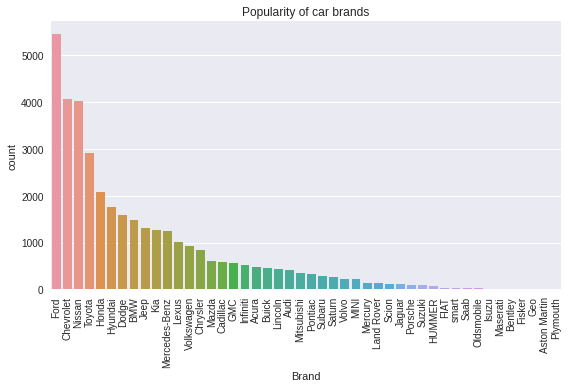

In [9]:
large_to_small = df.groupby('Brand').size().sort_values(ascending=False)
sns.countplot(x='Brand', data=df, order=large_to_small.index).set(title='Popularity of car brands')
plt.xticks(rotation=90)
plt.tight_layout()

dfCount = df['Brand'].value_counts()
dfCount.sort_values(ascending=False).head(3)

**Answer for Q1**: Ford,Chevrolet and Nissan

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

13284.423765799467
10981.888059701492


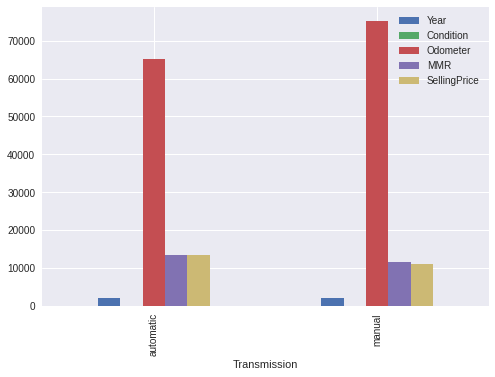

In [10]:
large_to_small = df.groupby('Transmission').mean().plot.bar()


sellingPAuto = df['SellingPrice'][df['Transmission'] == 'automatic'].mean()
sellingPManual = df['SellingPrice'][df['Transmission'] == 'manual'].mean()

print(sellingPAuto)
print(sellingPManual)

**Answer for Q2**: Yes Automatic cars sell for higher prices


**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text major ticklabel objects>)

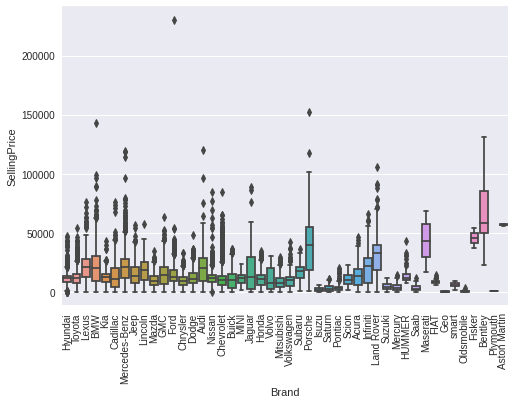

In [11]:
ax = sns.boxplot(x='Brand', y='SellingPrice', data= df)
plt.xticks(rotation=90)

**Answer for Q3**: Brands with widest distribution of selling price would be Bentley and Porsche. Most expensive would be Bentley, Porsche and BMW. 

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

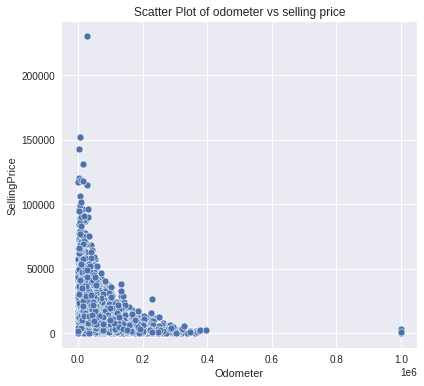

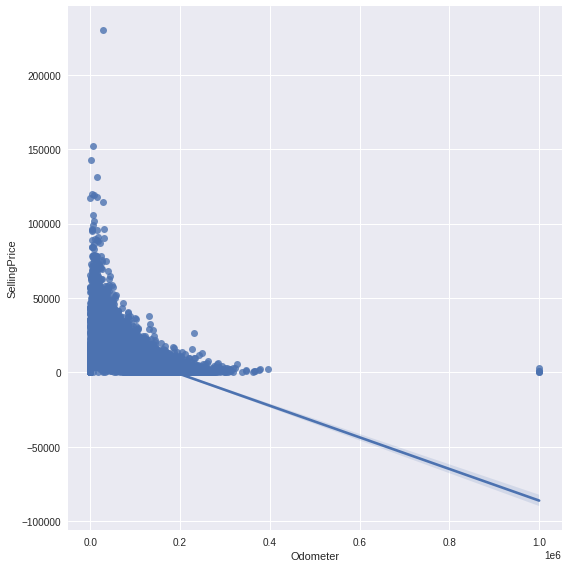

In [12]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='Odometer', y='SellingPrice', data=df, ax=ax)
ax.set_title('Scatter Plot of odometer vs selling price')


# Plot a line of best fit for each scatter plot
sns.lmplot(x='Odometer', y='SellingPrice', data=df, height=8)



# Adding them side by side by creating a subplot object

#sns.boxplot(x='bmw', y='charges', data=df['make']=='BMW', palette='Wistia', ax=ax)


**Answer for Q4**: There is a negative correlation between the odometer and the selling price

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

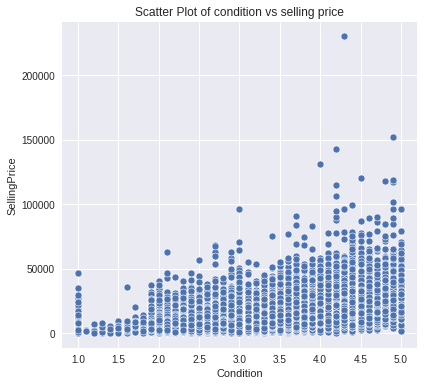

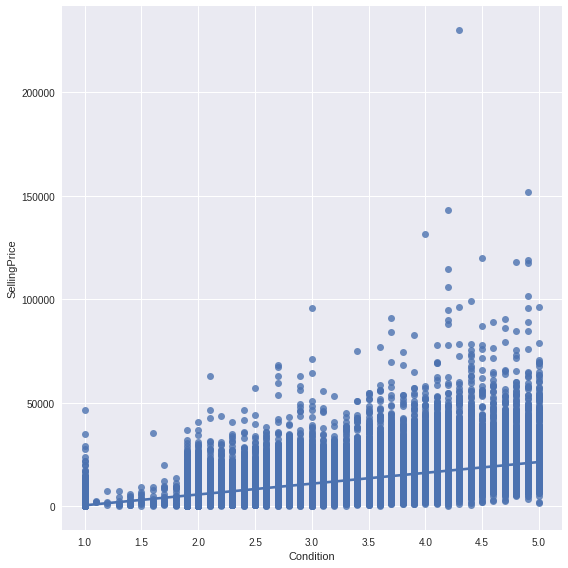

In [13]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='Condition', y='SellingPrice', data=df, ax=ax)
ax.set_title('Scatter Plot of condition vs selling price')


# Plot a line of best fit for each scatter plot
sns.lmplot(x='Condition', y='SellingPrice', data=df, height=8)

**Answer for Q5**: There's a weak positive correlation between the condition and the selling price

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

Body
Suv          16221.941270
Coupe        15925.785029
Sedan        11580.043630
Hatchback    10320.636123
Name: SellingPrice, dtype: float64
Most expensive:
Body
Suv    16221.94127
Name: SellingPrice, dtype: float64
Cheapest: 
Body
Hatchback    10320.636123
Name: SellingPrice, dtype: float64


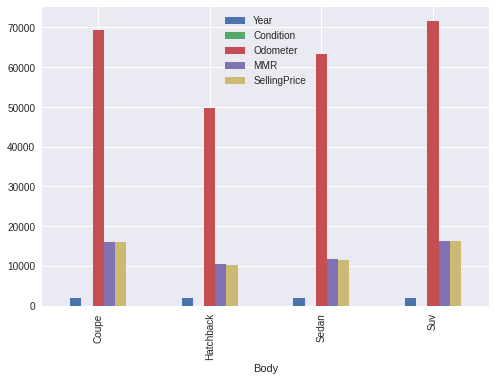

In [14]:
"""
df.groupby('body')
print(df.groupby('body'))
"""
large_to_small = df.groupby('Body').mean().plot.bar()

df2 = df.groupby('Body').mean()
#print(df2['sellingprice'])
df3 = df2.sort_values('SellingPrice', ascending=False)
print(df3['SellingPrice'])
dfExpensive = df2.sort_values('SellingPrice', ascending=False).head(1)
dfCheap = df2.sort_values('SellingPrice', ascending=False).tail(1)
print('Most expensive:')
print(dfExpensive['SellingPrice'])
print('Cheapest: ')
print(dfCheap['SellingPrice'])
#df2['sellingprice'].sort_values('sellingprice', ascending=False)
##########df2.sort_values('sellingprice', ascending=False).head(3)
###print(df['make'].sort_values('make', ascending=False).head(3))
#df2 = df.sort_values('make', ascending=False).head(3)

**Answer for Q6**: Yes there is differece, they are ranked as shown in code with most expensive: SUV, least expensive: Hatchback

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [15]:
df2 = df.drop(['Trim', 'Body','VIN','Seller', 'Odometer','Color','Interior','MMR','SaleDate','State'], axis = 1)

In [16]:
categorical_columns = ['Brand', 'Model','Transmission']
df_encode = pd.get_dummies(data=df2,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')

# Let's have a look at the difference in data before/after encoding
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['Year' 'Brand' 'Model' 'Trim' 'Body' 'Transmission' 'VIN' 'State'
 'Condition' 'Odometer' 'Color' 'Interior' 'Seller' 'MMR' 'SellingPrice'
 'SaleDate']

Number of rows and columns in the dataset: (36626, 16)

Columns in data frame after encoding dummy variable:
 ['Year' 'Condition' 'SellingPrice' 'Brand_Aston Martin' 'Brand_Audi'
 'Brand_BMW' 'Brand_Bentley' 'Brand_Buick' 'Brand_Cadillac'
 'Brand_Chevrolet' 'Brand_Chrysler' 'Brand_Dodge' 'Brand_FIAT'
 'Brand_Fisker' 'Brand_Ford' 'Brand_GMC' 'Brand_Geo' 'Brand_HUMMER'
 'Brand_Honda' 'Brand_Hyundai' 'Brand_Infiniti' 'Brand_Isuzu'
 'Brand_Jaguar' 'Brand_Jeep' 'Brand_Kia' 'Brand_Land Rover' 'Brand_Lexus'
 'Brand_Lincoln' 'Brand_MINI' 'Brand_Maserati' 'Brand_Mazda'
 'Brand_Mercedes-Benz' 'Brand_Mercury' 'Brand_Mitsubishi' 'Brand_Nissan'
 'Brand_Oldsmobile' 'Brand_Plymouth' 'Brand_Pontiac' 'Brand_Porsche'
 'Brand_Saab' 'Brand_Saturn' 'Brand_Scion' 'Brand_Subaru' 'Brand_Suzuki'
 'Brand_Toyota' 'Brand_Volkswag

In [17]:
df_encode.head()

,Year,Condition,SellingPrice,Brand_Aston Martin,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Buick,Brand_Cadillac,Brand_Chevrolet,Brand_Chrysler,Brand_Dodge,Brand_FIAT,Brand_Fisker,Brand_Ford,Brand_GMC,Brand_Geo,Brand_HUMMER,Brand_Honda,Brand_Hyundai,Brand_Infiniti,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Kia,Brand_Land Rover,Brand_Lexus,Brand_Lincoln,Brand_MINI,Brand_Maserati,Brand_Mazda,Brand_Mercedes-Benz,Brand_Mercury,Brand_Mitsubishi,Brand_Nissan,Brand_Oldsmobile,Brand_Plymouth,Brand_Pontiac,Brand_Porsche,Brand_Saab,...,Model_Wrangler,Model_X-Type,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_XC60,Model_XC90,Model_XF,Model_XG300,Model_XG350,Model_XJ,Model_XJ-Series,Model_XK,Model_XK-Series,Model_XL-7,Model_XL7,Model_XTS,Model_XV Crosstrek,Model_Xterra,Model_Yaris,Model_Yukon,Model_Yukon Denali,Model_Yukon Hybrid,Model_Yukon XL,Model_ZDX,Model_Zephyr,Model_accord,Model_envoy,Model_fortwo,Model_i-MiEV,Model_i8,Model_iQ,Model_malibu,Model_tC,Model_xA,Model_xD,Transmission_manual
0,2013,3.9,10900.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2014,4.9,29900.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2012,4.1,24200.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2002,1.9,3200.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2014,4.6,15500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
from sklearn.model_selection import train_test_split

x = df_encode.drop('SellingPrice',axis=1) # Independent variable
y = df_encode['SellingPrice'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 29300
Testing dataset size: 7326


## Modelling

_Apply the linear regression model below._

In [19]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

In [20]:
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,-2.980786e+06
1,theta_1,Year,1.489453e+03
2,theta_2,Condition,1.658967e+03
3,theta_3,Brand_Aston Martin,2.107467e+04
4,theta_4,Brand_Audi,1.373448e+04
...,...,...,...
532,theta_532,Model_malibu,-6.982670e+03
533,theta_533,Model_tC,-9.512148e+02
534,theta_534,Model_xA,1.007710e+03
535,theta_535,Model_xD,-3.069738e+03


## Model Evaluation & Validation

_Evaluate the model you applied and check if it meets the necessary assumptions for the chosen model._

In [21]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  4420.280533626036
R^2 obtained is: 0.781051660174069


In [22]:
from sklearn.metrics import mean_absolute_percentage_error, median_absolute_error, mean_squared_log_error
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = median_absolute_error(y_test, y_pred)

# Due to the model erroneously predicting negative values for the insurance charges, MSLE cannot be used (log of negative numbers is invalid)
# Such a discovery, while accidental, provides another hint that the predictions needs to be further improved before model deployment,
# as negative values should not be output for insurance charges predictions

# msle = mean_squared_log_error(y_test, y_pred)


print('The mean absolute percentage error (MAPE) is: ', mape)
print('The median absolute error (MAE) is: ', mae)

# print('The mean squared log error (MSLE) is: ', msle)

The mean absolute percentage error (MAPE) is:  0.6550767962511123
The median absolute error (MAE) is:  1941.7034076105338


Validation

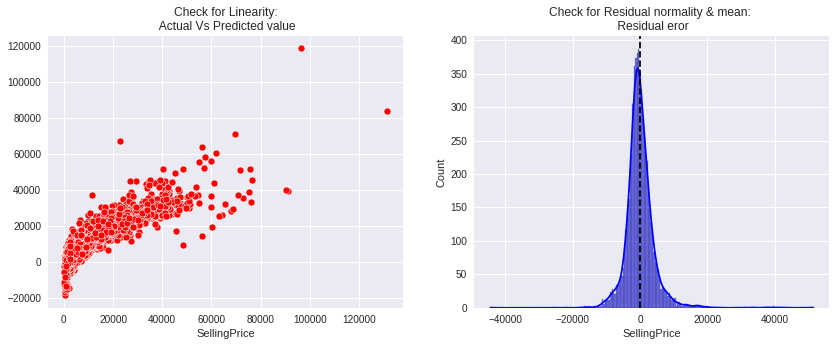

In [ ]:
# Checking for linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Checking for residual normality & mean
ax = f.add_subplot(122)
sns.histplot(x=(y_test - y_pred), ax=ax, color='b', kde=True)
ax.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

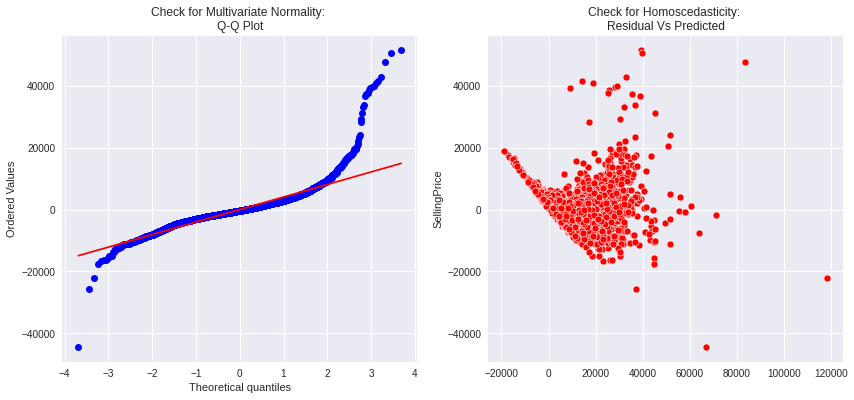

In [ ]:
# Check for Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred), fit=True, plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(x=y_pred, y=(y_test - y_pred), ax=ax[1], color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [ ]:
# Check for Multicollinearity
# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF_data = pd.DataFrame()
VIF_data['feature'] = x.columns 

VIF_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
VIF_data

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,Year,2.136649e+00
1,Condition,1.580129e+00
2,Brand_Aston Martin,inf
3,Brand_Audi,inf
4,Brand_BMW,2.285106e+04
...,...,...
515,Model_iQ,inf
516,Model_tC,inf
517,Model_xA,inf
518,Model_xD,inf


## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: 

The R^2 is 78% which is relatively a good percentage. 

The linearity curve shows that our results are relatively linear, which indicates we have good results.

The problem would be that the curve is showing some outliers which affect the linearity of the curve, so it would be better if we remove these outliers.

The model shows relatively good linearity results, I would recommend it, but definetly there are better approaches. 